In [ ]:
# TO DO
#*****************************

# try out all the NLP options
# work on text analysis

# add pittsburgh business locations into map

# make flask query mongodb and update map results
# work on more visualizations

    # should I have the site return on submit a list of restaurants instead of showing them on a map
    # or do both?



In [285]:
# from IPython.external import mathjax; mathjax.install_mathjax()

# import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [286]:
import json
from pymongo import MongoClient

client = MongoClient()

In [287]:
# merged restaurant business info and reviews
penn_restaurant_reviews = client.dsbc.penn_restaurant_reviews

### Original yelp data files

In [3]:
# calling yelp review and business collections in MongoDB
yelp_review = client.dsbc.yelp_review
yelp_biz = client.dsbc.yelp_biz

In [30]:
print "Count of number of reviews:", yelp_review.count()
print "Count of number of businesses:", yelp_biz.count()

Count of number of reviews: 1569264
Count of number of businesses: 61184


In [17]:
yelp_review.find_one()

{u'_id': ObjectId('54f769a42f639936f3d61248'),
 u'business_id': u'vcNAWiLM4dR7D2nwwJ7nCA',
 u'date': u'2007-05-17',
 u'review_id': u'15SdjuK7DmYqUAj6rjGowg',
 u'stars': 5,
 u'text': u"dr. goldberg offers everything i look for in a general practitioner.  he's nice and easy to talk to without being patronizing; he's always on time in seeing his patients; he's affiliated with a top-notch hospital (nyu) which my parents have explained to me is very important in case something happens and you need surgery; and you can get referrals to see specialists without having to see him first.  really, what more do you need?  i'm sitting here trying to think of any complaints i have about him, but i'm really drawing a blank.",
 u'type': u'review',
 u'user_id': u'Xqd0DzHaiyRqVH3WRG7hzg',
 u'votes': {u'cool': 1, u'funny': 0, u'useful': 2}}

In [18]:
yelp_biz.find_one()

{u'_id': ObjectId('54f769252f639936f3d52348'),
 u'attributes': {u'By Appointment Only': True},
 u'business_id': u'vcNAWiLM4dR7D2nwwJ7nCA',
 u'categories': [u'Doctors', u'Health & Medical'],
 u'city': u'Phoenix',
 u'full_address': u'4840 E Indian School Rd\nSte 101\nPhoenix, AZ 85018',
 u'hours': {u'Friday': {u'close': u'17:00', u'open': u'08:00'},
  u'Monday': {u'close': u'17:00', u'open': u'08:00'},
  u'Thursday': {u'close': u'17:00', u'open': u'08:00'},
  u'Tuesday': {u'close': u'17:00', u'open': u'08:00'},
  u'Wednesday': {u'close': u'17:00', u'open': u'08:00'}},
 u'latitude': 33.499313,
 u'longitude': -111.983758,
 u'name': u'Eric Goldberg, MD',
 u'neighborhoods': [],
 u'open': True,
 u'review_count': 9,
 u'stars': 3.5,
 u'state': u'AZ',
 u'type': u'business'}

### Aggregating all reviews as a list of dicts for each business

In [4]:
aggregate_review_data = yelp_review.aggregate(
 [
   
   { "$group" : {
        "_id" : "$business_id",
        "aggr_reviews" : {"$push":  { "date": "$date", "text": "$text", "stars": "$stars"} }       
       }
   },
   { "$out" : "agg_revs" }
 ],
    allowDiskUse = True
)

In [5]:
agg_revs = client.dsbc.agg_revs

In [6]:
agg_revs.find_one()

{u'_id': u'--1emggGHgoG6ipd_RMb-g',
 u'aggr_reviews': [{u'date': u'2013-03-30',
   u'stars': 5,
   u'text': u'A great place to stop for fuel or quick convenience items. Great prices on items in the store, lots of gas pumps to help during the busy times'},
  {u'date': u'2013-06-21',
   u'stars': 5,
   u'text': u'This gas station  is exacty as I expected. It is easy to get to from both North and South Dessert Inn and it never has a HUGE line.'},
  {u'date': u'2013-10-02',
   u'stars': 1,
   u'text': u"It's a gas station. Nothing special. The pumps look pretty disgusting. The glass was too scratched up to see the numbers. The entire place looks like it needs a good cleaning."},
  {u'date': u'2014-06-13',
   u'stars': 4,
   u'text': u"This gas station/mini mart is very convenient. I don't buy gas here the prices are always high. Maybe because it's on a major intersection, S. Decatur & Desert Inn. They stay on deck with my favorite cigarillos. Swisher Sweets Plain. I can usually get my 24oz

In [7]:
print "Number of unique businesses reviewed:", agg_revs.count()
# 60,785

Number of unique businesses reviewed: 60785


### MongoDB collection: penn_restos 

Business details on PA restaurants only 

In [12]:
# Restaurant data only 

pa_restos = yelp_biz.aggregate(
  [
    {"$unwind": "$categories"},
    {"$match": { "categories": "Restaurants", "state": "PA" } },
    {"$project": {"business_id": 1,"name": 1, "full_address": 1, 
                  "city": 1, "state": 1, "neighborhoods": 1, 
                  "attributes": 1, "categories": 1, "stars": 1, 
                  "latitude":1, "longitude":1,"review_count": 1}},
    {"$out": "penn_restos" }
  ],
    allowDiskUse = True
)


In [296]:
penn_restos = client.dsbc.penn_restos

In [16]:
print "Number of restaurants:", penn_restos.count()

Number of restaurants: 1361


In [15]:
penn_restos.find_one()

{u'_id': ObjectId('551438ad35689307bb55d5ae'),
 u'attributes': {u'Accepts Credit Cards': True,
  u'Alcohol': u'full_bar',
  u'Ambience': {u'casual': False,
   u'classy': False,
   u'divey': False,
   u'hipster': False,
   u'intimate': False,
   u'romantic': False,
   u'touristy': False,
   u'trendy': False,
   u'upscale': False},
  u'Attire': u'casual',
  u'Caters': True,
  u'Coat Check': False,
  u'Delivery': False,
  u'Good For': {u'breakfast': False,
   u'brunch': False,
   u'dessert': False,
   u'dinner': False,
   u'latenight': False,
   u'lunch': False},
  u'Good For Dancing': False,
  u'Good For Groups': True,
  u'Good for Kids': True,
  u'Happy Hour': False,
  u'Has TV': True,
  u'Music': {u'dj': False},
  u'Noise Level': u'average',
  u'Outdoor Seating': False,
  u'Parking': {u'garage': False,
   u'lot': False,
   u'street': False,
   u'valet': False,
   u'validated': False},
  u'Price Range': 1,
  u'Smoking': u'no',
  u'Take-out': True,
  u'Takes Reservations': False,
  u'Wai

In [ ]:
# testing for map data

# for map_coord in penn_restos.find({}, {"_id" : 0 , 
#                                     "name": 1, "business_id":1, "full_address": 1,
#                                     "longitude" : 1, "latitude": 1 }):
#     map_list = []
    
#     map_dict = {
#                 'biz_name': biz_reviews['name'],
#                 'biz_id': biz_reviews['business_id'],
#                 'address': biz_reviews['full_address'],
#                 'features':{"geometry": {"type": "Point", "coordinates":[biz_reviews['longitude'], biz_reviews['latitude']]}}}
#     map_list.append(map_dict)
#     break
    
# print map_list

### Merge PA restaurant info with reviews

In [ ]:
## NOTE: this is all mongo query code. In Javascript. NOT python!


### Test test 

# var f = db.penn_restos.find({}, {_id: 0, business_id: 1}).limit(10), n=[]; 
# f is list of 10 biz_id
# for (var i=0; i < f.length(); i++) n.push(f[i]['business_id']);
# db.agg_revs.find({_id: {$in: n}}, {})

# Testing to see where the error lies! 

# db.penn_restos.find().limit(3).forEach(
#     function(business) {
#         one_elem_list = db.agg_revs.find({"_id:" business.business_id}, {"aggr_reviews": 1, "_id": 0}).limit(1).toArray();
#         business.reviews = ["some text is here"];
#         db.test.insert(business);
# });

###################

# limit(1) - in place of .findOne
# toArray = makes data in a list for insertion later 
# aggr_reviews id = business_id, whereas penn_restos business_id = business_id

db.penn_restos.find().forEach(
    function(business) {
        one_elem_list = db.agg_revs.find({"_id": business.business_id}, {"aggr_reviews": 1, "_id": 0}).limit(1).toArray();
        if(one_elem_list.length > 0) {
        business.reviews = one_elem_list[0]["aggr_reviews"];
        db.penn_restaurant_reviews.insert(business);
    }
}
);



# NOT WORKING :(
# MONGODB JS CODE for merging sentiment of each review sentence
db.penn_resto_reviews.find().forEach(
    function(business) {
        one_elem_list = db.penn_review_sentiment.find({"_id": business.business_id}, {"reviews": 1, "_id": 0}).limit(1).toArray();
        if(one_elem_list.length > 0) {
        business.sent_reviews = one_elem_list[0]["reviews"];
        db.penn_merged.insert(business);
    }
}
);

# db.penn_review_sentiment.findOne({}, {"reviews": 1, "business_id":1, "_id":0})

In [17]:
penn_restaurant_reviews = client.dsbc.penn_restaurant_reviews

In [18]:
print "Count of PA restaurants with reviews:", penn_restaurant_reviews.count()

Count of PA restaurants with reviews: 1361


In [19]:
penn_restaurant_reviews.find_one()

{u'_id': ObjectId('551438ad35689307bb55d5bc'),
 u'attributes': {u'Accepts Credit Cards': True,
  u'Alcohol': u'none',
  u'Ambience': {u'casual': False,
   u'classy': False,
   u'divey': False,
   u'hipster': False,
   u'intimate': False,
   u'romantic': False,
   u'touristy': False,
   u'trendy': False,
   u'upscale': False},
  u'Attire': u'casual',
  u'Caters': False,
  u'Delivery': False,
  u'Good For Groups': True,
  u'Good for Kids': True,
  u'Has TV': False,
  u'Noise Level': u'average',
  u'Outdoor Seating': False,
  u'Parking': {u'garage': False,
   u'lot': False,
   u'street': False,
   u'valet': False,
   u'validated': False},
  u'Price Range': 1,
  u'Take-out': True,
  u'Takes Reservations': False,
  u'Waiter Service': False,
  u'Wheelchair Accessible': True,
  u'Wi-Fi': u'no'},
 u'business_id': u'rv7CY8G_XibTx82YhuqQRw',
 u'categories': u'Restaurants',
 u'city': u'Carnegie',
 u'full_address': u'Raceway Plz\nCarnegie, PA 15106',
 u'latitude': 40.3868915,
 u'longitude': -80.09

In [ ]:
/**
 * Data for the markers consisting of a name, a LatLng and a zIndex for
 * the order in which these markers should display on top of each
 * other.
 */

city, lat, long

var beaches = [
  ['Bondi Beach', -33.890542, 151.274856, 4],
  ['Coogee Beach', -33.923036, 151.259052, 5],
  ['Cronulla Beach', -34.028249, 151.157507, 3],
  ['Manly Beach', -33.80010128657071, 151.28747820854187, 2],
  ['Maroubra Beach', -33.950198, 151.259302, 1]
];

In [301]:
# test test - getting all coordinates of restaurants for mapping

map_list = []

for biz_reviews in penn_restaurant_reviews.find({}, {"_id" : 0 ,  
                                                 "name": 1, "business_id": 1,
                                                 "full_address" : 1, "latitude": 1, 
                                                 "longitude":1}):

#     sentence_dict = {
#                 'biz_name': biz_reviews['name'],
#                 'biz_id': biz_reviews['business_id'],
#                 'address': biz_reviews['full_address'],
#                 'features':[{"geometry": {"type": "Point", "coordinates":[]}}]}

    map_list.append([biz_reviews['name'],biz_reviews['latitude'],biz_reviews['longitude']]) 
    
print map_list

[[u"Long John Silver's", 40.3868915, -80.0937037], [u"Denny's", 40.391255, -80.073426], [u'Pizza Hut', 40.4566455, -80.0070383], [u"Emil's Lounge", 40.408735, -79.8663507], [u"Alexion's Bar & Grill", 40.415517, -80.067534], [u'Kings Family Restaurant', 40.3877323, -80.0928745], [u"Rocky's Lounge", 40.3964688, -80.0849416], [u'Gab & Eat', 40.3967441, -80.0847998], [u"Barb's Country Junction Cafe", 40.404638, -80.089985], [u"Paddy's Pour House", 40.40867, -80.085279], [u"Eat'n Park Hospitality Group", 40.4116918, -79.9123428], [u'Don Don Chinese Restaurant', 40.408343, -80.084861], [u"Papa J's", 40.4082572, -80.0854582], [u"McDonald's", 40.412086, -79.910032], [u"Steak 'n Shake", 40.413496, -79.9044562], [u'Sing Sing', 40.4094884, -79.9151108], [u'The Dragon Chinese Cuisine', 40.3867759, -79.9028194], [u'The Pizza Company', 40.385745, -79.9033649], [u'Great Wall Chinese Food', 40.4147064, -79.9877685], [u"Duke's Upper Deck Cafe", 40.405311, -79.912595], [u"Dave & Buster's", 40.4097113, -

In [302]:
len(map_list)

1361

In [ ]:
maxx = max(dic.values())             #finds the max value
>>> keys = [x for x,y in dic.items() if y ==maxx]  #list of all 
                                                   #keys whose value is equal to maxx
>>> keys

In [303]:
dict1 = [{'apple': {'a' : 10, 'x' : 44, 'f': 34, 'h':89, 'j': 90, 'd': 28, 'g' : 90}}, 
         {'banana': {'a' : 10, 'x' : 44, 'f': 34, 'h':89, 'j': 90, 'd': 28}}]

In [310]:
max_key_values = []
for dict_dict in dict1:
    for dict_values in dict_dict.values():
        max_value = max(dict_values.values())
        keys = [x for x,y in dict_values.items() if y ==max_value]
    max_key_values.append({dict_dict.keys(), keys})
print max_key_values

TypeError: unhashable type: 'list'

###Basic Exploration of PA restaurant data

In [64]:
# what is the avg number of reviews for PA restaurants?

avg_review = penn_restaurant_reviews.aggregate(
  [
    { "$group" : 
         {"_id" : 0 , 
                  "review_avg" : { "$avg" : "$review_count" } 
          } 
    },
  ],
)

print avg_review["result"]

[{u'_id': 0, u'review_avg': 37.38133725202057}]


In [75]:
# Review count per restaurant

hist_reviews = penn_restaurant_reviews.aggregate(
  [
    { "$group" : 
         {"_id" : "$review_count" , 
                  "review_count" : { "$sum" : 1 } 
          } 
    },
  ]
)

<Container object of 179 artists>

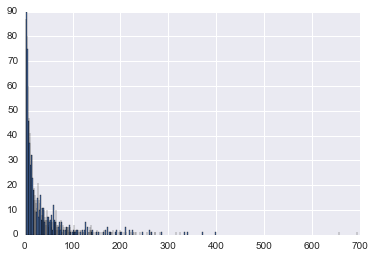

In [78]:
reviews = []
counts = []
for review_obj in hist_reviews["result"]:
    reviews.append(review_obj["_id"])
    counts.append(review_obj["review_count"])

#print years
#print counts
plt.bar(reviews, counts, align="center")

In [79]:
review_count = zip(reviews, counts)

In [81]:
sorted(review_count)

[(3, 87),
 (4, 90),
 (5, 80),
 (6, 75),
 (7, 60),
 (8, 46),
 (9, 47),
 (10, 37),
 (11, 41),
 (12, 28),
 (13, 23),
 (14, 32),
 (15, 32),
 (16, 23),
 (17, 18),
 (18, 18),
 (19, 19),
 (20, 14),
 (21, 16),
 (22, 10),
 (23, 14),
 (24, 13),
 (25, 9),
 (26, 11),
 (27, 15),
 (28, 21),
 (29, 7),
 (30, 14),
 (31, 10),
 (32, 13),
 (33, 16),
 (34, 11),
 (35, 6),
 (36, 8),
 (37, 11),
 (38, 6),
 (39, 11),
 (40, 10),
 (41, 5),
 (42, 7),
 (43, 6),
 (44, 6),
 (45, 4),
 (46, 6),
 (47, 10),
 (48, 7),
 (49, 3),
 (50, 7),
 (51, 4),
 (52, 5),
 (53, 6),
 (54, 6),
 (55, 3),
 (56, 8),
 (57, 5),
 (58, 2),
 (59, 2),
 (60, 12),
 (61, 5),
 (62, 6),
 (63, 5),
 (64, 5),
 (65, 10),
 (66, 2),
 (67, 4),
 (68, 3),
 (69, 2),
 (70, 4),
 (71, 3),
 (72, 2),
 (73, 5),
 (74, 4),
 (75, 2),
 (76, 6),
 (77, 5),
 (78, 1),
 (80, 4),
 (81, 2),
 (82, 3),
 (84, 2),
 (85, 2),
 (86, 3),
 (87, 3),
 (88, 3),
 (89, 3),
 (90, 3),
 (91, 2),
 (92, 1),
 (93, 3),
 (94, 4),
 (95, 3),
 (96, 1),
 (97, 2),
 (100, 1),
 (101, 1),
 (102, 2),
 (103, 4

In [ ]:
# Number of reviews range from 3-695
# many places have predominantly 3-7 reviews

In [65]:
# Avg star rating of restaurants

avg_star = penn_restaurant_reviews.aggregate(
  [
    { "$group" : 
         {"_id" : 0 , 
                  "review_star" : { "$avg" : "$stars" } 
          } 
    },
  ],
)

print avg_star["result"]

[{u'_id': 0, u'review_star': 3.5536370315944157}]


In [ ]:
# what is the star distribution of PA restaurants?

hist_data = penn_restaurant_reviews.aggregate(
  [
    { "$group" : 
         {"_id" : "$stars" , 
                  "star_count" : { "$sum" : 1 } 
          } 
    },
  ]
)

<Container object of 9 artists>

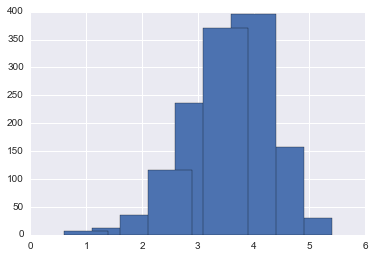

In [71]:
stars = []
counts = []
for star_obj in hist_data["result"]:
    stars.append(star_obj["_id"])
    counts.append(star_obj["star_count"])

#print years
#print counts
plt.bar(stars, counts, align="center")

In [73]:
star_count = zip(stars, counts)

In [82]:
sorted(star_count)

[(1.0, 6),
 (1.5, 12),
 (2.0, 36),
 (2.5, 116),
 (3.0, 237),
 (3.5, 371),
 (4.0, 395),
 (4.5, 158),
 (5.0, 30)]

In [ ]:
# Many restaurants have 4 stars

In [ ]:
# Distribution of price ranges

In [93]:
price_data = penn_restaurant_reviews.aggregate(
  [
    { "$group" : 
         {"_id" : "$attributes.Price Range" , 
                  "price_count" : { "$sum" : 1 } 
          } 
    },
  ]
)

In [95]:
price = []
counts = []
for price_obj in price_data["result"]:
    price.append(price_obj["_id"])
    counts.append(price_obj["price_count"])

# plt.bar(price, counts, align="center")

In [97]:
price_count = zip(price, counts)

In [98]:
sorted(price_count)

[(None, 80), (1, 566), (2, 615), (3, 87), (4, 13)]

In [ ]:
# Mainly, one and two dollar signs out of four 
# Many of the restaurants are cheap to fairly inexpensive 

In [ ]:
# Any correlation between price and star rating?

In [163]:
# NEEDS WORK! 

price = []
stars = []
for info in penn_restaurant_reviews.find({}, {"_id" : 0 , "attributes.Price Range" : 1, "stars": 1 }):

    price.append(info['attributes.Price Range']) # not able to append value for some odd reason
    stars.append(info['stars'])

KeyError: 'attributes.Price\\ Range'

### MongoDB Collection: penn_sentiments

each document has restaurant name, ID, reviews is a long list of dicts, in which each dict contains one sentence from a review and its polarity and subjectivity scores

In [254]:
penn_sentiments = client.dsbc.penn_sentiments

In [256]:
# # dict of restaurant IDs, name, individual review sentence and its polarity and subjectivity

for biz_reviews in penn_restaurant_reviews.find({}, {"_id" : 0 , 
                                                 "name": 1, "business_id": 1,
                                                 #"reviews.stars" : 1, 
                                                 "reviews.text": 1 }):
    
    review_text = []
    review_sentiment_list = []
    
    for review_list in biz_reviews['reviews']:     
        review_text.append(review_list['text'])

        joined_text = "" .join(review_text) # joining all reviews as one 

    for sentence_tokenized in sent_tokenize(joined_text):
        sentence_dict = {'text': sentence_tokenized, 
                    'polarity_score': TextBlob(sentence_tokenized).sentiment.polarity, 
                    'subjectivity_score': TextBlob(sentence_tokenized).sentiment.subjectivity}

        review_sentiment_list.append(sentence_dict)
    
    biz_reviews['reviews'] = review_sentiment_list
    penn_sentiments.insert(biz_reviews) # insert each document into mongo
    


In [257]:
penn_sentiments.find_one()

{u'_id': ObjectId('551a0c4c35689312e24c5969'),
 u'business_id': u'rv7CY8G_XibTx82YhuqQRw',
 u'name': u"Long John Silver's",
 u'reviews': [{u'polarity_score': 0.2,
   u'subjectivity_score': 0.2,
   u'text': u'Are you are really looking at the review for LJS?'},
  {u'polarity_score': 0.0,
   u'subjectivity_score': 0.1,
   u'text': u'Its fried stuff, with extra fried stuff in a cardboard boat.'},
  {u'polarity_score': 0.0,
   u'subjectivity_score': 0.0,
   u'text': u'You will regret eating it 30 minutes after you finish, but it is delicious.I agree with Paul on this one.'},
  {u'polarity_score': 0.0,
   u'subjectivity_score': 0.0,
   u'text': u'But I had to stop here on my way home from work tonight.'},
  {u'polarity_score': 0.175,
   u'subjectivity_score': 0.325,
   u'text': u'(I think I feel my heart yelling at me again) , The gal at the drive thru window was just soooo sweet , I just might go back and ask her to marry me!'},
  {u'polarity_score': 0.0,
   u'subjectivity_score': 0.0,
   

### MongoDB Collection: penn_unwind

each document has restaurant name, ID, single sentence from review and its polarity and subjectivity scores

In [263]:
penn_unwind = client.dsbc.penn_unwind

In [264]:
# unwind - make each document a dict with a single sentence from a review, 
# review sentiment, biz_name and ID


for biz_reviews in penn_restaurant_reviews.find({}, {"_id" : 0 , 
                                                 "name": 1, "business_id": 1,
                                                 #"reviews.stars" : 1, 
                                                 "reviews.text": 1 }):
    
    review_text = []
    
    for review_list in biz_reviews['reviews']:     
        review_text.append(review_list['text'])

        joined_text = "" .join(review_text) # joining all reviews as one 

    for sentence_tokenized in sent_tokenize(joined_text):
        sentence_dict = {'text': sentence_tokenized, 
                    'polarity_score': TextBlob(sentence_tokenized).sentiment.polarity, 
                    'subjectivity_score': TextBlob(sentence_tokenized).sentiment.subjectivity,
                    'biz_name': biz_reviews['name'],
                    'biz_id': biz_reviews['business_id']}
        
        penn_unwind.insert(sentence_dict) # insert each document into mongo
    

In [268]:
penn_unwind.find_one()

{u'_id': ObjectId('551abe3535689312e24c5eba'),
 u'biz_id': u'rv7CY8G_XibTx82YhuqQRw',
 u'biz_name': u"Long John Silver's",
 u'polarity_score': 0.2,
 u'subjectivity_score': 0.2,
 u'text': u'Are you are really looking at the review for LJS?'}

In [270]:
print 'Number of sentences', penn_unwind.count()

Number of sentences 395722


In [278]:
# put all the reviews in a list
penn_unwind

review_list = []
for sentence_review in penn_unwind.find({}, {"_id" : 0 , "text": 1 }):
    review_list.append(sentence_review['text'])
    
#print review_list

In [279]:
len(review_list)

395722

In [280]:
review_list[0]

u'Are you are really looking at the review for LJS?'

### MongoDB Collection: penn_unwind_location

each document has restaurant name, ID, address, geocoordinate, single sentence from review and its polarity and subjectivity scores

In [ ]:
penn_unwind_location = client.dsbc.penn_unwind_location

In [294]:
# Penn unwind with biz address, lat, long info

for biz_reviews in penn_restaurant_reviews.find({}, {"_id" : 0 , 
                                                 "name": 1, "business_id": 1,
                                                 "full_address" : 1, "latitude": 1, 
                                                 "longitude":1, "reviews.text": 1 }):
    
    review_text = []
    
    for review_list in biz_reviews['reviews']:     
        review_text.append(review_list['text'])

        joined_text = "" .join(review_text) # joining all reviews as one 

    for sentence_tokenized in sent_tokenize(joined_text):
        sentence_dict = {'text': sentence_tokenized, 
                    'polarity_score': TextBlob(sentence_tokenized).sentiment.polarity, 
                    'subjectivity_score': TextBlob(sentence_tokenized).sentiment.subjectivity,
                    'biz_name': biz_reviews['name'],
                    'biz_id': biz_reviews['business_id'],
                    'address': biz_reviews['full_address'],
                    'features':[{"geometry": {"type": "Point", "coordinates":[biz_reviews['longitude'], biz_reviews['latitude']]}}]}

        penn_unwind_location.insert(sentence_dict) # insert each document into mongo


In [295]:
penn_unwind_location.find_one()

{u'_id': ObjectId('551d832935689312e2526884'),
 u'address': u'Raceway Plz\nCarnegie, PA 15106',
 u'biz_id': u'rv7CY8G_XibTx82YhuqQRw',
 u'biz_name': u"Long John Silver's",
 u'features': [{u'geometry': {u'coordinates': [-80.0937037, 40.3868915],
    u'type': u'Point'}}],
 u'polarity_score': 0.2,
 u'subjectivity_score': 0.2,
 u'text': u'Are you are really looking at the review for LJS?'}

In [297]:


for feature in penn_unwind_location.find({}, {"_id" : 0 , "features": 1}):
    for location in feature['features']:
        print location['geometry']['coordinates']
        break
    break

[-80.0937037, 40.3868915]


In [93]:
penn_review_sentiment = client.dsbc.penn_review_sentiment

In [94]:
import json
with open('penn_reviews_sentiment.json', 'w') as outfile:
    json.dump(indiv_sentence_sentiment, outfile)

###Review clean-up

In [81]:
# dict of restaurants with their zipped tokenized sentences with its polarity score
# removing punctuation ??

# DRAFT

# import re
# import string

# regex = re.compile('[%s]' % re.escape(string.punctuation)) #see documentation here: http://docs.python.org/2/library/string.html

# from nltk.tokenize import word_tokenize
# from nltk.tokenize import sent_tokenize
# from textblob import TextBlob

# indiv_sentence_sentiment = {}

# for biz_review in biz_review_list: # biz_review is a dict of resto name: reviews

#     sentence_tokenized_list = []
#     sentence_sentiment = []
#     zipped_sentence_sentiment = []
#     tokenized_docs_no_punctuation = []
    
#     for reviews in biz_review.values(): # reviews is unicode of reviews
#         new_review = []
#         new_token = regex.sub(u'', reviews)
#         if not new_token == u'':
#             new_review.append(new_token)
#         tokenized_docs_no_punctuation.append(new_review)
#         break
#     break
# print tokenized_docs_no_punctuation
        
#         for sentence_tokenized in sent_tokenize(reviews):
#             sentence_tokenized_list.append(sentence_tokenized)
#             sentence_sentiment.append(TextBlob(sentence_tokenized).sentiment.polarity)
#         zipped_sentence_sentiment.append(zip(sentence_tokenized_list,sentence_sentiment))
    
#     for name in biz_review.keys():
#         indiv_sentence_sentiment[name] = zipped_sentence_sentiment

        

[[u'Are you are really looking at the review for LJS  Its fried stuff with extra fried stuff in a cardboard boat  You will regret eating it 30 minutes after you finish but it is deliciousI agree with Paul on this one But I had to stop here on my way home from work tonight \nI think I feel my heart yelling at me again  The gal at the drive thru window was just soooo sweet  I just might go back and ask her to marry me \nBut then again  she gave me a slip with a survey on it to fill out online \nMaybe she just wanted my positive response Ok Sarah B you got it  now wheres my free coke Its deep fried garbageits LOS cmon what do you expecthowever I have never had better friendlier service at a fast food restaurant']]


In [135]:
# Removing stop words

from nltk.corpus import stopwords

tokenized_docs_no_stopwords = []
for doc in tokenized_docs_no_punctuation:
    new_term_vector = []
    for word in doc:
        if not word in stopwords.words('english'):
            new_term_vector.append(word)
    tokenized_docs_no_stopwords.append(new_term_vector)
            
print tokenized_docs_no_stopwords

[[u'Are', u'really', u'looking', u'review', u'LJS', u'Its', u'fried', u'stuff', u'extra', u'fried', u'stuff', u'cardboard', u'boat', u'You', u'regret', u'eating', u'30', u'minutes', u'finish', u'delicious'], [u'I', u'agree', u'Paul', u'one', u'But', u'I', u'stop', u'way', u'home', u'work', u'tonight', u'I', u'think', u'I', u'feel', u'heart', u'yelling', u'The', u'gal', u'drive', u'thru', u'window', u'soooo', u'sweet', u'I', u'might', u'go', u'back', u'ask', u'marry', u'But', u'gave', u'slip', u'survey', u'fill', u'online', u'Maybe', u'wanted', u'positive', u'response', u'Ok', u'Sarah', u'B', u'got', u'free', u'coke'], [u'It', u'deep', u'fried', u'garbage', u'LOS', u'cmon', u'expect', u'however', u'I', u'never', u'better', u'friendlier', u'service', u'fast', u'food', u'restaurant']]


### Tokenizing and Sentiment Analysis

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from textblob import TextBlob

In [136]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

porter = PorterStemmer()
snowball = SnowballStemmer('english')
wordnet = WordNetLemmatizer()

preprocessed_docs = []

# Trying out PorterStemmer

for doc in tokenized_docs_no_stopwords:
    final_doc = []
    for word in doc:
        final_doc.append(porter.stem(word))
        #final_doc.append(snowball.stem(word))
        #final_doc.append(wordnet.lemmatize(word)) #note that lemmatize() can also takes part of speech as an argument!
    preprocessed_docs.append(final_doc)

print preprocessed_docs

[[u'Are', u'realli', u'look', u'review', u'LJ', u'It', u'fri', u'stuff', u'extra', u'fri', u'stuff', u'cardboard', u'boat', u'You', u'regret', u'eat', u'30', u'minut', u'finish', u'delici'], [u'I', u'agre', u'Paul', u'one', u'But', u'I', u'stop', u'way', u'home', u'work', u'tonight', u'I', u'think', u'I', u'feel', u'heart', u'yell', u'The', u'gal', u'drive', u'thru', u'window', u'soooo', u'sweet', u'I', u'might', u'go', u'back', u'ask', u'marri', u'But', u'gave', u'slip', u'survey', u'fill', u'onlin', u'Mayb', u'want', u'posit', u'respons', u'Ok', u'Sarah', u'B', u'got', u'free', u'coke'], [u'It', u'deep', u'fri', u'garbag', u'LO', u'cmon', u'expect', u'howev', u'I', u'never', u'better', u'friendlier', u'servic', u'fast', u'food', u'restaur']]


In [137]:
# Snowball Stemming
for doc in tokenized_docs_no_stopwords:
    final_doc = []
    for word in doc:
        #final_doc.append(porter.stem(word))
        final_doc.append(snowball.stem(word))
        #final_doc.append(wordnet.lemmatize(word)) #note that lemmatize() can also takes part of speech as an argument!
    preprocessed_docs.append(final_doc)

print preprocessed_docs

[[u'Are', u'realli', u'look', u'review', u'LJ', u'It', u'fri', u'stuff', u'extra', u'fri', u'stuff', u'cardboard', u'boat', u'You', u'regret', u'eat', u'30', u'minut', u'finish', u'delici'], [u'I', u'agre', u'Paul', u'one', u'But', u'I', u'stop', u'way', u'home', u'work', u'tonight', u'I', u'think', u'I', u'feel', u'heart', u'yell', u'The', u'gal', u'drive', u'thru', u'window', u'soooo', u'sweet', u'I', u'might', u'go', u'back', u'ask', u'marri', u'But', u'gave', u'slip', u'survey', u'fill', u'onlin', u'Mayb', u'want', u'posit', u'respons', u'Ok', u'Sarah', u'B', u'got', u'free', u'coke'], [u'It', u'deep', u'fri', u'garbag', u'LO', u'cmon', u'expect', u'howev', u'I', u'never', u'better', u'friendlier', u'servic', u'fast', u'food', u'restaur'], [u'are', u'realli', u'look', u'review', u'ljs', u'it', u'fri', u'stuff', u'extra', u'fri', u'stuff', u'cardboard', u'boat', u'you', u'regret', u'eat', u'30', u'minut', u'finish', u'delici'], [u'i', u'agre', u'paul', u'one', u'but', u'i', u'stop',

In [138]:
# Lemmatizing

for doc in tokenized_docs_no_stopwords:
    final_doc = []
    for word in doc:
        #final_doc.append(porter.stem(word))
        #final_doc.append(snowball.stem(word))
        final_doc.append(wordnet.lemmatize(word)) #note that lemmatize() can also takes part of speech as an argument!
    preprocessed_docs.append(final_doc)

print preprocessed_docs

[[u'Are', u'realli', u'look', u'review', u'LJ', u'It', u'fri', u'stuff', u'extra', u'fri', u'stuff', u'cardboard', u'boat', u'You', u'regret', u'eat', u'30', u'minut', u'finish', u'delici'], [u'I', u'agre', u'Paul', u'one', u'But', u'I', u'stop', u'way', u'home', u'work', u'tonight', u'I', u'think', u'I', u'feel', u'heart', u'yell', u'The', u'gal', u'drive', u'thru', u'window', u'soooo', u'sweet', u'I', u'might', u'go', u'back', u'ask', u'marri', u'But', u'gave', u'slip', u'survey', u'fill', u'onlin', u'Mayb', u'want', u'posit', u'respons', u'Ok', u'Sarah', u'B', u'got', u'free', u'coke'], [u'It', u'deep', u'fri', u'garbag', u'LO', u'cmon', u'expect', u'howev', u'I', u'never', u'better', u'friendlier', u'servic', u'fast', u'food', u'restaur'], [u'are', u'realli', u'look', u'review', u'ljs', u'it', u'fri', u'stuff', u'extra', u'fri', u'stuff', u'cardboard', u'boat', u'you', u'regret', u'eat', u'30', u'minut', u'finish', u'delici'], [u'i', u'agre', u'paul', u'one', u'but', u'i', u'stop',

### TF-IDF

High tf-idf means that a term is somewhat uncommon across the corpus. Low means that it is common.

In [281]:
# vectorize yelp review text and get tf-idfs

import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer 


stop = stopwords.words('english')
tfidf_vectorizer = TfidfVectorizer(stop_words=stop)
tfidf_matrix = tfidf_vectorizer.fit_transform(review_list)

In [282]:
print 'There are '+ str(tfidf_matrix.get_shape()[0]) + ' documents over a vocabulary feature space of ' + \
      str(tfidf_matrix.get_shape()[1]) + ' terms.'

There are 395722 documents over a vocabulary feature space of 47767 terms.


In [283]:
from pprint import pprint
vocab_index = tfidf_vectorizer.vocabulary_   # vocab_index is a single dict 

# append all features and indices into a dict
index_vocab = {index: feature for feature, index in vocab_index.items()}

# translate sparse to coo matrix

from scipy.sparse import coo_matrix

In [ ]:
top_yelp_words = []

for i in range(len(review_list)):
    individual_review = tfidf_matrix.getrow(i) # get the ith row as coordinate - value pairs
    cx = coo_matrix(individual_review)

    feature_tfidf = zip(cx.col, cx.data) # col is feature, data is tfidf
    # sort by tfidf, which is cx.data, in descending order and return only the top 25
    top_25 = sorted(feature_tfidf, key=lambda tfidf: tfidf[1], reverse=True)[:25]

    for x in top_25:         
        top_yelp_words.append([index_vocab[x[0]],x[1]])

pprint(sorted(top_yelp_words, key=lambda tfidf: tfidf[1], reverse=True))

[[u'awesome', 1.0],
 [u'glad', 1.0],
 [u'aha', 1.0],
 [u'yep', 1.0],
 [u'huge', 1.0],
 [u'excellent', 1.0],
 [u'truly', 1.0],
 [u'tasty', 1.0],
 [u'wow', 1.0],
 [u'ever', 1.0],
 [u'cheers', 1.0],
 [u'back', 1.0],
 [u'delicious', 1.0],
 [u'seat', 1.0],
 [u'ate', 1.0],
 [u'delish', 1.0],
 [u'recall', 1.0],
 [u'yum', 1.0],
 [u'toast', 1.0],
 [u'tips', 1.0],
 [u'cash', 1.0],
 [u'food', 1.0],
 [u'lol', 1.0],
 [u'fresh', 1.0],
 [u'tasty', 1.0],
 [u'yum', 1.0],
 [u'great', 1.0],
 [u'packed', 1.0],
 [u'cash', 1.0],
 [u'overtime', 1.0],
 [u'aggravating', 1.0],
 [u'place', 1.0],
 [u'still', 1.0],
 [u'hurrah', 1.0],
 [u'crude', 1.0],
 [u'disappoint', 1.0],
 [u'fantastic', 1.0],
 [u'delicious', 1.0],
 [u'take', 1.0],
 [u'dipping', 1.0],
 [u'yum', 1.0],
 [u'special', 1.0],
 [u'yes', 1.0],
 [u'oily', 1.0],
 [u'oily', 1.0],
 [u'mention', 1.0],
 [u'outrageous', 1.0],
 [u'rich', 1.0],
 [u'stunning', 1.0],
 [u'ugh', 1.0],
 [u'mad', 1.0],
 [u'ridiculous', 1.0],
 [u'yuck', 1.0],
 [u'kidding', 1.0],
 [u'ap

### Bigram + Trigram

In [103]:
vectorizer = TfidfVectorizer(stop_words=stop, ngram_range=(1,2))
yelp_vectors = vectorizer.fit_transform(review_list)

In [104]:
from pprint import pprint
vocab_index = vectorizer.vocabulary_   # vocab_index is a single dict 

# append all features and indices into a dict
index_vocab = {index: feature for feature, index in vocab_index.items()}

# translate sparse to coo matrix

from scipy.sparse import coo_matrix

top_yelp_words = []

for i in range(len(review_list)):
    individual_review = yelp_vectors.getrow(i) # get the ith row as coordinate - value pairs
    cx = coo_matrix(individual_review)

    feature_tfidf = zip(cx.col, cx.data) # col is feature, data is tfidf
    # sort by tfidf, which is cx.data, in descending order and return only the top 25
    top_25 = sorted(feature_tfidf, key=lambda tfidf: tfidf[1], reverse=True)[:25]

    for x in top_25:         
        top_yelp_words.append([index_vocab[x[0]],x[1]])

pprint(sorted(top_yelp_words, key=lambda tfidf: tfidf[1], reverse=True))

[[u'fried stuff', 0.32741338703185219],
 [u'stuff', 0.32741338703185219],
 [u'fried', 0.24900632006616369],
 [u'food restaurant', 0.19397045648632985],
 [u'fast food', 0.19397045648632985],
 [u'service fast', 0.19397045648632985],
 [u'friendlier service', 0.19397045648632985],
 [u'better friendlier', 0.19397045648632985],
 [u'never better', 0.19397045648632985],
 [u'however never', 0.19397045648632985],
 [u'expect however', 0.19397045648632985],
 [u'mon expect', 0.19397045648632985],
 [u'los mon', 0.19397045648632985],
 [u'garbage los', 0.19397045648632985],
 [u'fried garbage', 0.19397045648632985],
 [u'deep fried', 0.19397045648632985],
 [u'restaurant', 0.19397045648632985],
 [u'food', 0.19397045648632985],
 [u'fast', 0.19397045648632985],
 [u'service', 0.19397045648632985],
 [u'friendlier', 0.19397045648632985],
 [u'better', 0.19397045648632985],
 [u'never', 0.19397045648632985],
 [u'however', 0.19397045648632985],
 [u'expect', 0.19397045648632985],
 [u'mon', 0.19397045648632985],
 [

In [107]:
vectorizer = TfidfVectorizer(stop_words=stop, ngram_range=(1,3))
yelp_vectors = vectorizer.fit_transform(review_list)

In [108]:
from pprint import pprint
vocab_index = vectorizer.vocabulary_   # vocab_index is a single dict 

# append all features and indices into a dict
index_vocab = {index: feature for feature, index in vocab_index.items()}

# translate sparse to coo matrix

from scipy.sparse import coo_matrix

top_yelp_words = []

for i in range(len(review_list)):
    individual_review = yelp_vectors.getrow(i) # get the ith row as coordinate - value pairs
    cx = coo_matrix(individual_review)

    feature_tfidf = zip(cx.col, cx.data) # col is feature, data is tfidf
    # sort by tfidf, which is cx.data, in descending order and return only the top 25
    top_25 = sorted(feature_tfidf, key=lambda tfidf: tfidf[1], reverse=True)[:25]

    for x in top_25:         
        top_yelp_words.append([index_vocab[x[0]],x[1]])

pprint(sorted(top_yelp_words, key=lambda tfidf: tfidf[1], reverse=True))

[[u'fried stuff', 0.27651755047007759],
 [u'stuff', 0.27651755047007759],
 [u'fried', 0.21029872449767989],
 [u'fast food restaurant', 0.16100074927698105],
 [u'service fast food', 0.16100074927698105],
 [u'friendlier service fast', 0.16100074927698105],
 [u'better friendlier service', 0.16100074927698105],
 [u'never better friendlier', 0.16100074927698105],
 [u'however never better', 0.16100074927698105],
 [u'expect however never', 0.16100074927698105],
 [u'mon expect however', 0.16100074927698105],
 [u'los mon expect', 0.16100074927698105],
 [u'garbage los mon', 0.16100074927698105],
 [u'fried garbage los', 0.16100074927698105],
 [u'deep fried garbage', 0.16100074927698105],
 [u'food restaurant', 0.16100074927698105],
 [u'fast food', 0.16100074927698105],
 [u'service fast', 0.16100074927698105],
 [u'friendlier service', 0.16100074927698105],
 [u'better friendlier', 0.16100074927698105],
 [u'never better', 0.16100074927698105],
 [u'however never', 0.16100074927698105],
 [u'expect howe

### Cosine Similarity

In [148]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words=stop)
tfidf_matrix = tfidf_vectorizer.fit_transform(review_text)

print tfidf_matrix.shape

(3, 65)


In [149]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(tfidf_matrix)

array([[ 1.        ,  0.        ,  0.07143351],
       [ 0.        ,  1.        ,  0.        ],
       [ 0.07143351,  0.        ,  1.        ]])

u'rv7CY8G_XibTx82YhuqQRw'

In [ ]:
# Additional untried test code below

In [149]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.metrics.pairwise import euclidean_distances

In [150]:
import nltk
import re
from nltk import word_tokenize   
from nltk.stem import WordNetLemmatizer  
import cPickle as pickle     
import os, json
from flask import Flask, g, render_template, request, jsonify
import numpy as np
import scipy as scipy

In [ ]:
#  nltk for tokenizing + stemming + Tfidf weighting + cosine similarity. This similarity metric is then weighted based upon the similarity in genre and the popularity of the book, where each of these weights is controlled by the user. 

In [ ]:
def bag_of_words_tfidf(lst):
    '''
    Constructs a bag of words model, where each document is a Facebook post/comment
    Also applies TFIDF weighting, lemmatization, and filter out stopwords
    '''
    model = Model(documents=[], weight=TFIDF)
    for msg, link in lst:
        doc = Document(msg, stemmer=LEMMA, stopwords=True, name=msg, description=link)
        model.append(doc)
    return model

def cosine_similarity(model, term, num=10):
    '''
    Finds the cosine similarity between the input document and each document in 
    the corpus, and outputs the best 'num' results
    '''
    doc = Document(term, stemmer=LEMMA, stopwords=True, name=term)
    return model.neighbors(doc, top=num)

def process_similarity(result):
    '''
    Processes the result in a nicely formatted table
    
    result is a tuple of length 2, where the first item is the similarity score, 
    and the second item is the document itself
    '''
    pt = PrettyTable(field_names=['Post', 'Sim', 'Link'])
    pt.align['Post'], pt.align['Sim'], pt.align['Link'] = 'l', 'l', 'l'
    [ pt.add_row([res[1].name[:45] + '...', "{0:.2f}".format(res[0]), 
                  res[1].description]) for res in result ]
    return pt

In [ ]:
QUERY = 'declaring major early'
NUM_SEARCH = 10

In [ ]:
sim = cosine_similarity(bag_of_words, QUERY, NUM_SEARCH)
print process_similarity(sim)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  

tfidf_vectorizer = TfidfVectorizer(stop_words=stop)
tfidf_matrix = tfidf_vectorizer.fit_transform(train_set)
print tfidf_matrix
cosine = cosine_similarity(tfidf_matrix[length-1], tfidf_matrix)
print cosine

In [ ]:
penn_reviews = []
penn_review_stars = []
penn_str = ""

for review_dict in yelp_combined.find({"state": "PA"}, {"reviews.text":1, "reviews.stars":1,"_id": 0}):
    reviews_list = review_dict["reviews"]
    ## both reviews and star ratings
    tuple_list = [(single_review["text"], single_review["stars"]) for single_review in reviews_list]
    penn_review_stars.extend(tuple_list)
    
    ## text only
    text_list = [word_tuple[0] for word_tuple in tuple_list]
    penn_reviews.extend(text_list)
    
    ## all reviews as a single string
    for word_tuple in tuple_list:
        penn_str += word_tuple[0] + "\n"


### KMeans Clustering

In [ ]:
# in Flask app 

def kmeans(text_search_result):
    """ Cluster reviews and find review closest to centroid"""

    review_list = [value['obj']['text'] for value in text_search_result['results']]
    restaurant = [value['obj']['biz_name'] for value in text_search_result['results']]

    vectorizer = TfidfVectorizer(stop_words="english", ngram_range=(1,1))

    #yelp_vectors = vectorizer.fit(review_list)                                                                     
    review_vectors = vectorizer.fit_transform(review_list)

    n_clusters = 5
    #km = KMeans(n_clusters=k)                                                                                      
    km = MiniBatchKMeans(n_clusters=n_clusters)

    # Compute clustering and transform yelp_vectors to cluster-distance space                                       
    km_fit = km.fit_transform(review_vectors)

    sentence_clusters = zip(km.labels_,restaurant,review_list,review_vectors)

    sentence_cluster_dict = {} # value: j[1]=restaurant_name, j[2]=review                                           
                               # key: cluster_number                                                                

    for i, j in enumerate(sentence_clusters):
        sentence_cluster_dict.setdefault(j[0], []).append(j[1:])

    for cluster, sentences in sentence_cluster_dict.iteritems():

        center_sentence =  np.matrix(km.cluster_centers_[cluster])
        sentence_vectors = vstack([vector[2] for vector in sentences]) #vstack needed for sparse matrix             
        sentence_vectors = sentence_vectors.toarray()
        sentence_words = [vector[1] for vector in sentences]
        restaurant_names = [vector[0] for vector in sentences]
        distances = pairwise_distances(sentence_vectors, center_sentence, metric='cosine')
        sentence_distances = sorted(list(zip(distances,sentence_words)))
        center_sentence_text = sentence_distances[0][1]

        similar_sentiment_count = len(sentence_words)

        close_sentence_text = [sentence[1] for sentence in sentence_distances[1:5]]

        cluster_dict = {'center_sentence_text': center_sentence_text,
                        'close_sentence_text': close_sentence_text,
                        'cluster_sentence_count': similar_sentiment_count}
    return cluster_dict

### Ignore below...tried and failed attempts in collaborative filtering

### Collection with collaborative filtering data only

In [27]:
# user_id, biz_id, and star rating data only

data = yelp_review.aggregate(
  [
    {"$project": {"_id": 0, "reviewer_id": "$user_id", "biz_id": "$business_id", "stars": "$stars"}},
    {"$out": "yelp_recommendation" }
  ],
    allowDiskUse = True
)

In [28]:
yelp_recommendation = client.dsbc.yelp_recommendation

In [35]:
print "Number of reviews:", yelp_recommendation.count()

Number of reviews: 1569264


In [30]:
yelp_recommendation.find_one()

{u'_id': ObjectId('5501f0ace17446a0d3d8ba3f'),
 u'biz_id': u'vcNAWiLM4dR7D2nwwJ7nCA',
 u'reviewer_id': u'Xqd0DzHaiyRqVH3WRG7hzg',
 u'stars': 5}

In [24]:
# For crab - need data to be in dict of dict ({user: {biz id: star rating}})

In [54]:
crab_data = yelp_review.aggregate(
  [
    { "$group" : {
        "_id" : "$user_id",
        "reviews": {"$push": {"biz_id": "$business_id", "stars": "$stars"}}}},
    {"$out": "crab_data" }
  ],
    allowDiskUse = True
)

In [3]:
crab_data = client.dsbc.crab_data

In [4]:
print "Number of reviewers:", crab_data.count()

Number of reviewers: 366715


In [59]:
crab_data.find_one()

{u'_id': u'---_j-GW5aCBtf62ihHwCw',
 u'reviews': [{u'biz_id': u'v76uEBa0jkRl8AH28piX4w', u'stars': 1}]}

In [ ]:
# ! pip install -U crab
# http://muricoca.github.io/crab/install.html

### Formatting data for crabbing

In [86]:
# {user_id:{item_id: preference, item_id2: preference, ...}, user_id2: {...}, ...}

In [90]:
crab_data.find_one()

{u'_id': u'---_j-GW5aCBtf62ihHwCw',
 u'reviews': [{u'biz_id': u'v76uEBa0jkRl8AH28piX4w', u'stars': 1}]}

In [63]:
reviewers = []
for review in crab_data.find({}, { "_id": 1}):
    reviewers.append(review['_id'])

In [12]:
biz = []
stars = []
for review in crab_data.find({}, { "reviews": 1, "_id": 0}):
    for key, value in review.iteritems(): # value is list of dicts
        for biz_star_list in value:
            stars.append(biz_star_list['stars'])
            biz.append(biz_star_list['biz_id'])

In [13]:
len(reviewers)

NameError: name 'reviewers' is not defined

In [14]:
len(zip(biz, stars))

1569264

In [91]:
biz_stars = dict(zip(biz,stars)) 

In [96]:
len(stars)

1569264

In [94]:
len(biz_stars) # shorter because dict can only have one unique key

60785

In [13]:
crab_list = []
crab_dict = {}

biz = []
stars = []

for data in crab_data.find({}, {"reviews": 1, "_id": 1}):
    
    for review in data['reviews']: # list of dicts  {u'stars': 1, u'biz_id': u'v76uEBa0jkRl8AH28piX4w'}        
        biz.append(review['biz_id'])
        stars.append(review['stars'])
        
    crab_dict[data['_id']] = dict(zip(biz, stars))
crab_list.append(crab_dict)

CursorNotFound: cursor id '52692696974' not valid at server

In [12]:
from pprint import pprint 
pprint(crab_list)

[{u'---_j-GW5aCBtf62ihHwCw': {u'v76uEBa0jkRl8AH28piX4w': 1},
  u'--0HEXd4W6bJI8k7E0RxTA': {u'ZvvTPVqChi-mQd1JV6VM5w': 5,
                              u'bcBMAa0UQpNLFvvdZ4dxtQ': 5,
                              u'v76uEBa0jkRl8AH28piX4w': 1},
  u'--0KsjlAThNWua2Pr4HStQ': {u'DoKUOUwAsWrlRY6ehzQV_w': 4,
                              u'NjHwPn2d3TL_xxnheXoSmw': 3,
                              u'UG1che-DRtvE45Ni2bqwbA': 5,
                              u'ZvvTPVqChi-mQd1JV6VM5w': 5,
                              u'bcBMAa0UQpNLFvvdZ4dxtQ': 5,
                              u'fUlzYKXFTMFEDQtjzm6GXA': 4,
                              u'k-ClRJsPYJtsI8NRtiLdTA': 4,
                              u's4QDG7jg9JafcugkggE6Xg': 5,
                              u'v76uEBa0jkRl8AH28piX4w': 1},
  u'--0mI_q_0D1CdU4P_hoImQ': {u'DoKUOUwAsWrlRY6ehzQV_w': 4,
                              u'NjHwPn2d3TL_xxnheXoSmw': 3,
                              u'UG1che-DRtvE45Ni2bqwbA': 5,
                              u'ZvvTP

In [15]:
len(crab_dict)

29312

### Crabbing 

In [ ]:
# Content-based filtering: items are mapped into a feature space, and recommendations depend on item characteristics.
# Collaborative filtering: recommendations are only based on user-ratings

In [ ]:
from scikits import crab
from scikits.crab.models import MatrixPreferenceDataModel
# The MatrixPreferenceDataModel implementation stores and provides access to all the user
# and biz data as also the associated preferences (AKA star ratings) needed in the computation
from scikits.crab.metrics import pearson_correlation
from scikits.crab.similarities import UserSimilarity

model = MatrixPreferenceDataModel(crab_dict)
similarity = UserSimilarity( model, pearson_correlation)
print similarity.model


In [ ]:
# Took too long - deleted crab

### python recsys

In [ ]:
# ! sudo pip install csc-pysparse networkx divisi2
# https://github.com/ocelma/python-recsys

In [21]:
from recsys.algorithm.factorize import SVD

# load test movie dataset
svd = SVD()
svd.load_data(filename='/Users/delraydo/python-recsys-master/data/ratings.dat',
            sep='::',
            format={'col':0, 'row':1, 'value':2, 'ids': int})

In [22]:
# Compute Singular Value Decomposition (SVD), M=U Sigma V^t:

k = 100
svd.compute(k=k,
            min_values=10,
            pre_normalize=None,
            mean_center=True,
            post_normalize=True,
            savefile='/tmp/movielens')

In [23]:
# Get similarity between two movies:

ITEMID1 = 1    # Toy Story (1995)
ITEMID2 = 2355 # A bug's life (1998)

svd.similarity(ITEMID1, ITEMID2)
# 0.67706936677315799

0.67706936677314966

In [24]:
# Get movies similar to Toy Story:
svd.similar(ITEMID1)
# Returns: <ITEMID, Cosine Similarity Value>

[(1, 0.99999999999999978),
 (3114, 0.87060391051017305),
 (2355, 0.67706936677314977),
 (588, 0.58073514967544992),
 (595, 0.46031829709744226),
 (1907, 0.44589398718134982),
 (364, 0.42908159895577563),
 (2081, 0.42566581277822413),
 (3396, 0.42474056361934953),
 (2761, 0.40439361857576017)]

In [27]:
# Which users should see Toy Story? (e.g. which users -that have not rated Toy Story- would give it a high rating?)
svd.recommend(ITEMID)
# Returns: <USERID, Predicted Rating>

[(869, 6.8215500393190904),
 (4086, 6.2667649038936908),
 (549, 6.2394061595542869),
 (1343, 6.2163075783431427),
 (1586, 6.039893928886932),
 (840, 5.9616632765170472),
 (1676, 5.896233772781037),
 (4595, 5.88945710113423),
 (2691, 5.8735094161364714),
 (2665, 5.8498694241604259)]